## Simple Linear Regression

Q1) Delivery_time-> Predict delivery time using sorting time

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.shape

(21, 2)

In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [9]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d38a988e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d38a98e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d38a98640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d38a99360>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d38a99600>],
 'means': []}

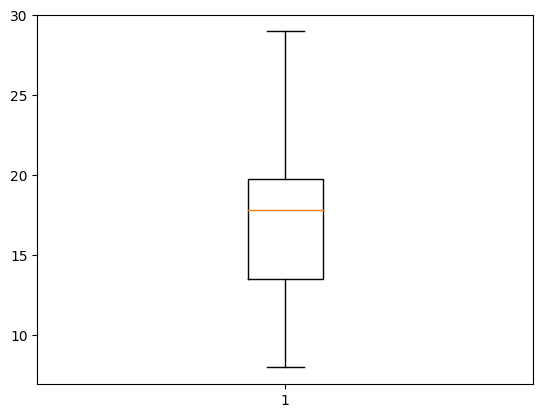

In [10]:
plt.boxplot(data["Delivery Time"]) # no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d389830a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d389835e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d38982e00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d38983b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d38983dc0>],
 'means': []}

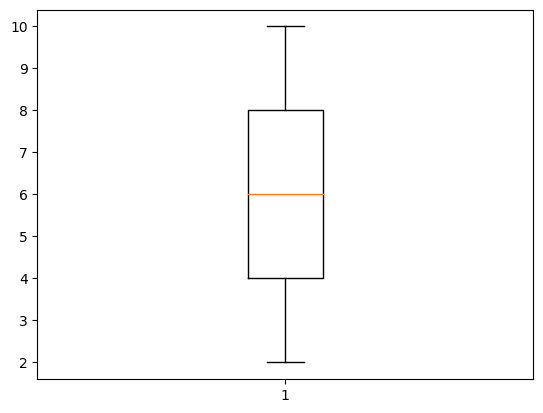

In [11]:
plt.boxplot(data["Sorting Time"])

In [12]:
import seaborn as sns

<ipython-input-13-395f6b0195c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

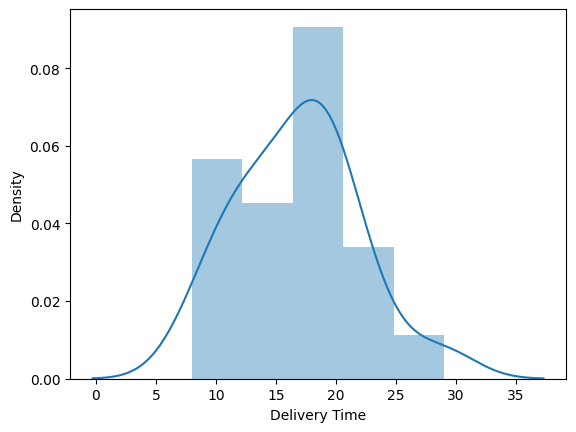

In [13]:
sns.distplot(data["Delivery Time"])

<ipython-input-14-ea343d2ed14a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

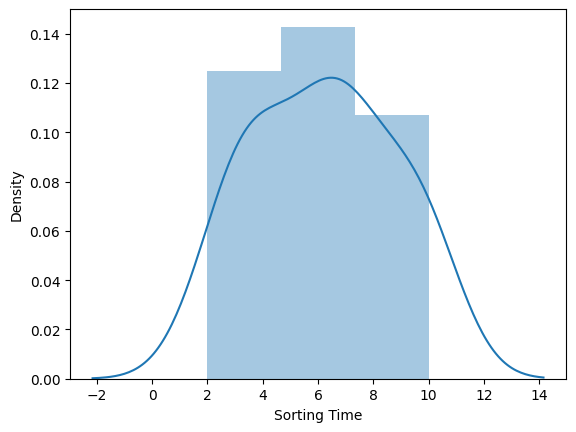

In [14]:
sns.distplot(data["Sorting Time"])

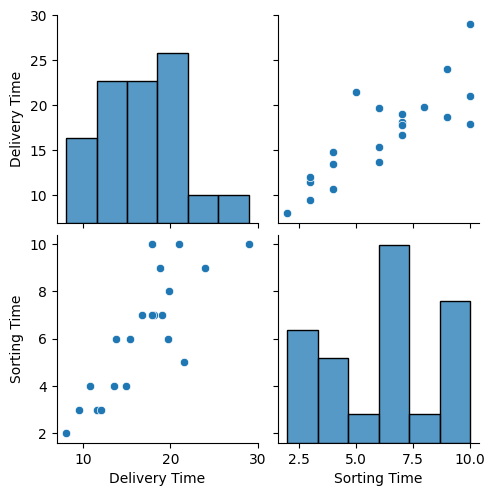

In [15]:
sns.pairplot(data)

<Axes: >

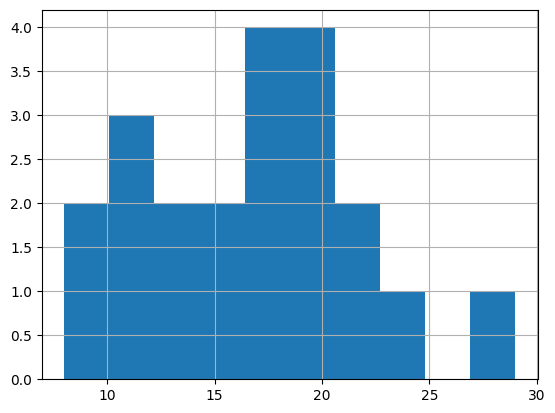

In [16]:
data["Delivery Time"].hist()

<Axes: >

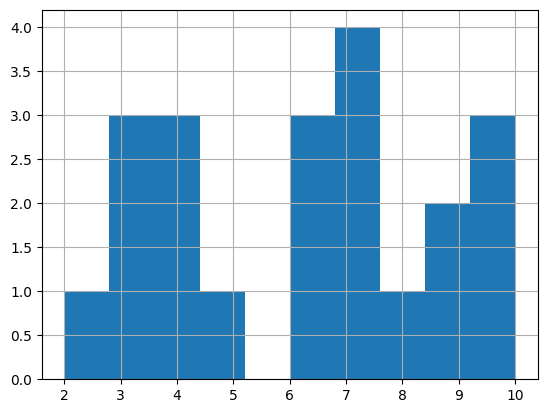

In [17]:
data["Sorting Time"].hist()

In [18]:
data=data.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)
data # renaming column name

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

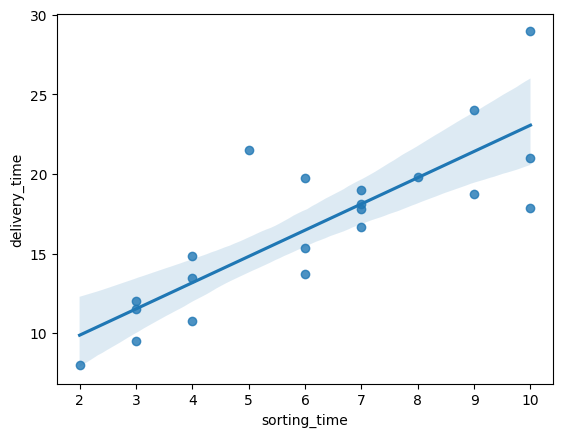

In [27]:
sns.regplot(x="sorting_time",y="delivery_time",data=data)

# Correlation

In [19]:
data.corr() # correlation analysis

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


## Model Building

In [20]:
import statsmodels.formula.api as smf # model -Regession model
model=smf.ols("sorting_time~delivery_time",data=data).fit()

In [21]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [26]:
print(model.params,"\n",model.tvalues,"\n",model.pvalues)

Intercept       -0.756673
delivery_time    0.413744
dtype: float64 
 Intercept       -0.667290
delivery_time    6.387447
dtype: float64 
 Intercept        0.512611
delivery_time    0.000004
dtype: float64


In [22]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.682271474841723, 0.6655489208860242)

In [23]:
model.predict(data)

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        12:03:42   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import numpy as np
model2=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=data).fit()
# using log

In [30]:
print(model2.params,"\n",model2.tvalues,"\n",model2.pvalues)

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64 
 Intercept               13.085552
np.log(sorting_time)     8.024484
dtype: float64 
 Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


In [32]:
# R squared values
(model2.rsquared,model2.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 21 Jun 2023   Prob (F-statistic):           1.60e-07
Time:                           12:13:14   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model3=smf.ols("delivery_time~np.square(sorting_time)",data=data).fit()
# using square

In [36]:
print(model3.params,"\n",model3.tvalues,"\n",model3.pvalues)

Intercept                  11.237205
np.square(sorting_time)     0.124870
dtype: float64 
 Intercept                  9.398601
np.square(sorting_time)    5.691330
dtype: float64 
 Intercept                  1.415704e-08
np.square(sorting_time)    1.739194e-05
dtype: float64


In [37]:
# R squared values
(model3.rsquared,model3.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [38]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.74e-05
Time:                        12:18:58   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(sorting_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model4=smf.ols("delivery_time~np.sqrt(sorting_time)",data=data).fit()
# usein sqrt

In [42]:
print(model4.params,"\n",model4.tvalues,"\n",model4.pvalues)

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64 
 Intercept               -0.840911
np.sqrt(sorting_time)    6.592434
dtype: float64 
 Intercept                0.410857
np.sqrt(sorting_time)    0.000003
dtype: float64


In [44]:
# R squared values
(model4.rsquared,model4.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [43]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           2.61e-06
Time:                        12:21:09   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""